In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
path = '/kaggle/input/vitr-df/vitr_df.csv'
vitr_df=pd.read_csv(path,sep=',')

In [4]:
vitr_df

,КоличествоЧеков,КоличествоТоваров,СреднееКолвоТоваровВЧеке,КоличествоВыкупленныхЧеков,КоличествоВыкупленныхТоваров,СрКолвоВыкупВЧеке,ВыручкаВыкуп,Выручка,ПроцентВыкупа,ОДЕЖДА,...,Подгузники,Обувь,"Канцтовары, Книги, Диски",Товары для кормления,Женские штучки,КОСМЕТИКА/ГИГИЕНА,ДЕТСКОЕ ПИТАНИЕ,СОПУТСТВУЮЩИЕ ТОВАРЫ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА
0,383,383,1.000000,322,322,1.000000,96102.0,104520.00,91.946039,55,...,1,1,7,3,2,5,2,1,1,2
1,366,1388,3.792350,0,0,0.000000,0.0,121181.00,0.000000,0,...,5,2,4,2,3,2,3,7,32,1
2,355,383,1.078873,13,13,1.000000,6498.0,164308.96,3.954745,124,...,1,2,8,1,1,1,2,1,6,1
3,354,399,1.127119,140,146,1.042857,35665.0,90352.65,39.473109,73,...,2,1,2,2,1,1,3,1,1,1
4,351,1029,2.931624,0,0,0.000000,0.0,98327.00,0.000000,25,...,1,4,1,1,1,1,7,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495832,1,1,1.000000,0,0,0.000000,0.0,1040.00,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
495833,1,1,1.000000,0,0,0.000000,0.0,7400.00,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
495834,1,1,1.000000,0,0,0.000000,0.0,5225.00,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
495835,1,1,1.000000,0,0,0.000000,0.0,397.00,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


# KMEANS
### Метод локтя

In [38]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 31)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k)
    kmeanModel = kmeans.fit(vitr_df)
    kmeanModel.fit(vitr_df)
    distortions.append(sum(np.min(cdist(vitr_df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / vitr_df.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(vitr_df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / vitr_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [39]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 5786.336662717346
3 : 5001.10150762701
4 : 4873.784946288373
5 : 4286.522679459206
6 : 3899.5035427513303
7 : 3611.4103850775323
8 : 3420.698893669689
9 : 3259.1375868552623
10 : 3009.997443925961
11 : 2884.0881844751484
12 : 2712.262067936846
13 : 2571.790097521759
14 : 2439.3853393931145
15 : 2477.7427906155
16 : 2296.8236423171147
17 : 2189.7453828292596
18 : 2054.214651777698
19 : 2006.4625481945666
20 : 1965.559698410266
21 : 1882.5461167338988
22 : 1881.7628525153336
23 : 1813.25538154457
24 : 1754.3186978404244
25 : 1728.0164416291504
26 : 1747.9771176722666
27 : 1657.1020008177054
28 : 1625.0788567633017
29 : 1579.1874911007662
30 : 1543.6434510608942


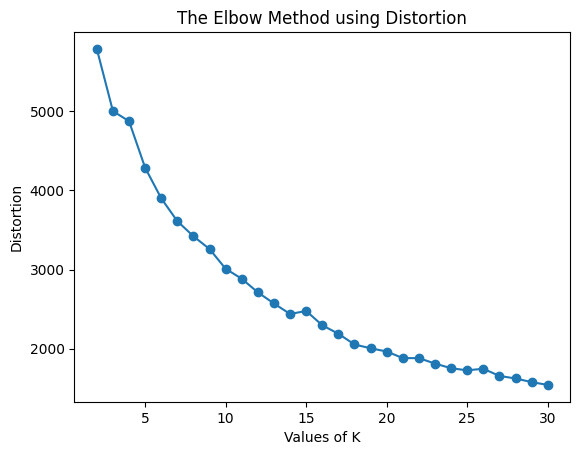

In [40]:
plt.plot(K, distortions, marker='o')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### Метод Дэвиса-Болдинга

In [41]:
from sklearn.metrics import davies_bouldin_score

# Инициализация списков для хранения значений индекса Дэвиса-Болдинга
davies_bouldin_scores = []

K = range(2, 31) 

for k in K:
    # Создание и обучение модели KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vitr_df)
    
    # Расчет индекса Дэвиса-Болдинга и сохранение в список
    davies_bouldin = davies_bouldin_score(vitr_df, kmeans.labels_)
    davies_bouldin_scores.append(davies_bouldin)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

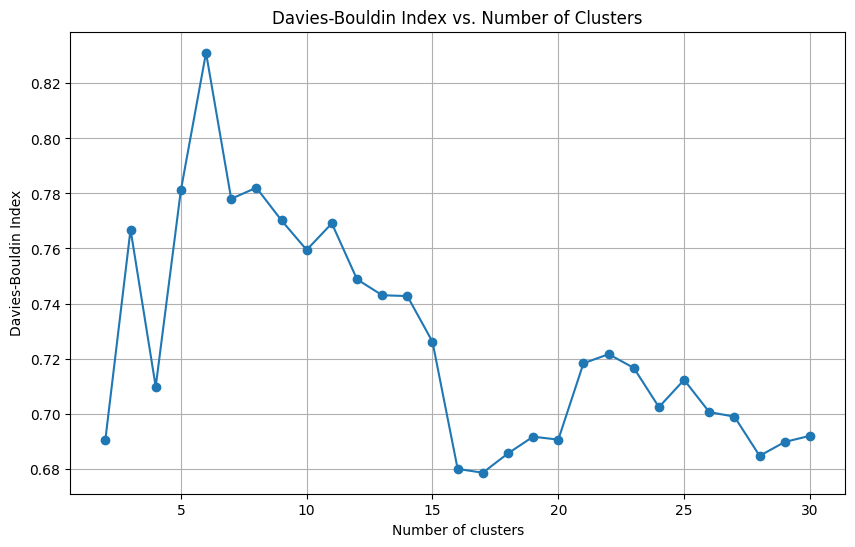

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(K, davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.grid(True)
plt.show()

### Силуэт

In [6]:
from sklearn.metrics import silhouette_score

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
vitr_df_scaled = scaler.fit_transform(vitr_df)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans

silhouette_scores = []
kmeans = MiniBatchKMeans(n_clusters=k, random_state=10, batch_size=100, max_iter=100) 

sample_vitr_df = vitr_df.sample(frac=0.1)


for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=10, batch_size=100) # Пример размера батча: 100
    labels = kmeans.fit_predict(sample_vitr_df) # Если вы масштабировали данные
    score = silhouette_score(sample_vitr_df, labels, metric='euclidean')
    silhouette_scores.append(score)
    print('For n_clusters =', k, 'Silhouette Score:', score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 Silhouette Score: 0.8337623122001804


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 Silhouette Score: 0.6609405738868971


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 Silhouette Score: 0.6076699888141948


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 Silhouette Score: 0.3168175836077845


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 Silhouette Score: 0.5265595982566104


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 Silhouette Score: 0.4351602137442625


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 Silhouette Score: 0.4728910222582737


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 Silhouette Score: 0.37444428391145834


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 Silhouette Score: 0.42653320698295966


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11 Silhouette Score: 0.4218091277622816


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 Silhouette Score: 0.3854888886959814


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13 Silhouette Score: 0.42615309217375685


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14 Silhouette Score: 0.43492298210997143


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15 Silhouette Score: 0.4427968839241728


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16 Silhouette Score: 0.40932303312310636


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 17 Silhouette Score: 0.4130642863065863


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18 Silhouette Score: 0.4404355401641059


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 19 Silhouette Score: 0.4172505053808926


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 20 Silhouette Score: 0.42898914597536514


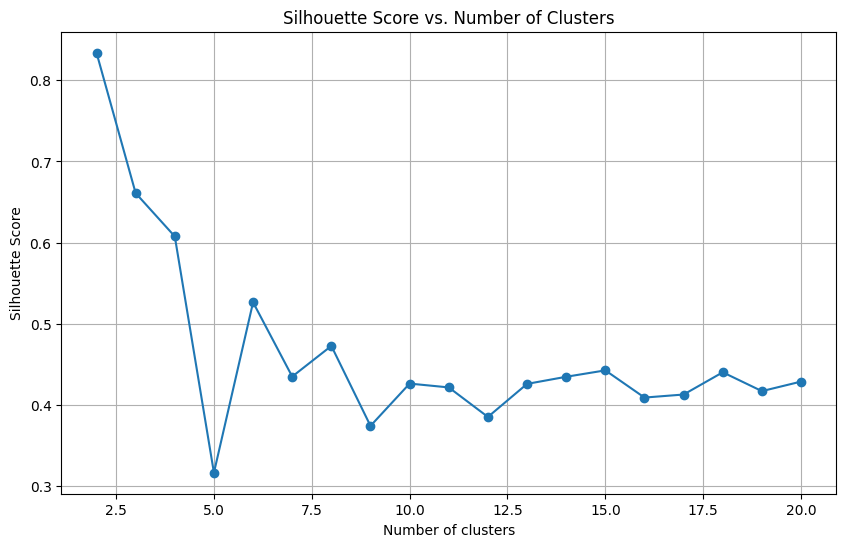

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

Однако из-за величины датасета данные обработаны не полностью и пришлось прибегнуть к менее точной системе оценивания


In [15]:
k=4
kmeans = KMeans(n_clusters=k)
kmeanModel = kmeans.fit(vitr_df)
kmeanModel.fit(vitr_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [16]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [17]:
df_k4 = vitr_df.copy()
df_k4['Label'] = kmeans.labels_. tolist ()

In [18]:
df_k4.to_excel("kmeans4.xlsx")  

In [33]:
k=8
kmeans = KMeans(n_clusters=k)
kmeanModel = kmeans.fit(vitr_df)
kmeanModel.fit(vitr_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [34]:
kmeans.labels_

array([2, 5, 7, ..., 0, 0, 0], dtype=int32)

In [35]:
df_k8 = vitr_df.copy()
df_k8['Label'] = kmeans.labels_. tolist ()

In [36]:
df_k8.to_excel("kmeans8.xlsx")  

In [25]:
k=16
kmeans = KMeans(n_clusters=k)
kmeanModel = kmeans.fit(vitr_df)
kmeanModel.fit(vitr_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16)

In [26]:
kmeans.labels_

array([ 7,  2,  4, ..., 12,  8,  8], dtype=int32)

In [27]:
df_k16 = vitr_df.copy()
df_k16['Label'] = kmeans.labels_. tolist ()

In [28]:
df_k16.to_excel("kmeans16.xlsx") 

In [2]:
df_k8=pd.read_excel('/kaggle/input/clatering/kmeans8.xlsx')

In [5]:
df_k16=pd.read_excel('/kaggle/input/clatering/kmeans16.xlsx')

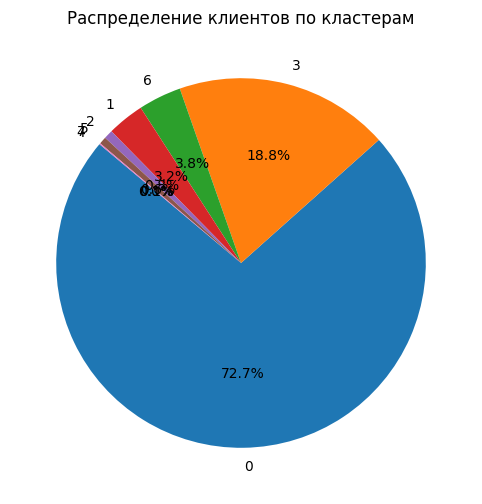

In [3]:
cluster_counts = df_k8['Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels = cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение клиентов по кластерам')
plt.show()

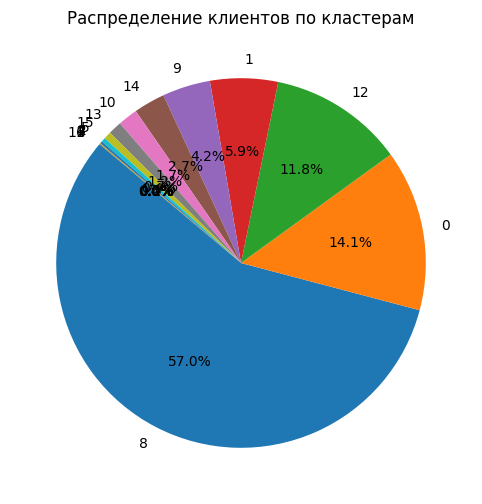

In [6]:
cluster_counts = df_k16['Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels = cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение клиентов по кластерам')
plt.show()

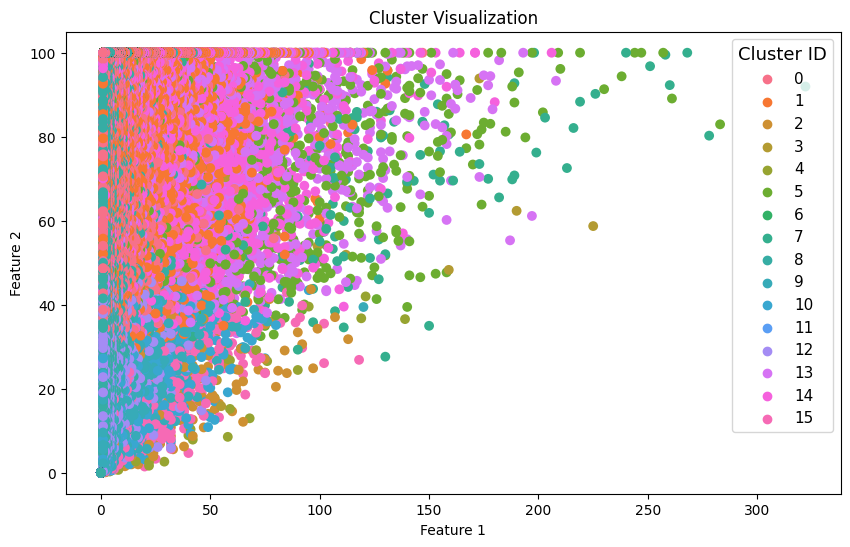

In [21]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette('husl', df_k16['Label'].nunique())
plot = sns.scatterplot(x=df_k16.iloc[:, 4], y=df_k16.iloc[:, 9], hue=df_k16['Label'], palette=palette, s=50, edgecolor='none')

plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster ID', title_fontsize='13', fontsize='11', loc='upper right')
plt.show()

In [4]:
cluster_counts = df_k16['Label'].value_counts().sort_index()
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Label', 'Count']

cluster_counts_transposed = cluster_counts_df.T
cluster_counts_transposed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Count,69895,29392,1003,32,192,1839,4,317,282614,20832,8569,7,58442,5821,13620,3258


In [21]:
category_columns = [
    'Текстиль, Трикотаж', 'ППКП', 'ИГРУШКИ', 'КГТ', 'ИНОЕ', 
    'Подгузники', 'Обувь', 'Канцтовары, Книги, Диски', 
    'Товары для кормления', 'Женские штучки', 'КОСМЕТИКА/ГИГИЕНА', 
    'ДЕТСКОЕ ПИТАНИЕ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 
    'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА', 'ОДЕЖДА']

cluster_data = df_k16.groupby('Label')[category_columns].sum()
cluster_data['Total'] = df_k16['Label'].value_counts()
if cluster_data.index.tolist() != cluster_data['Total'].index.tolist():
    cluster_data['Total'] = cluster_data['Total'].reindex(cluster_data.index).fillna(0)

cluster_data.reset_index()

,Label,"Текстиль, Трикотаж",ППКП,ИГРУШКИ,КГТ,ИНОЕ,Подгузники,Обувь,"Канцтовары, Книги, Диски",Товары для кормления,Женские штучки,КОСМЕТИКА/ГИГИЕНА,ДЕТСКОЕ ПИТАНИЕ,СОПУТСТВУЮЩИЕ ТОВАРЫ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ОДЕЖДА,Total
0,0,121117,145294,115954,27549,95150,55905,19580,14373,25334,7,43996,72005,19,706,8,92248,69895
1,1,85075,146431,77281,23745,66665,43392,24941,24581,28520,111,48577,88361,216,2420,57,81052,29392
2,2,3966,34904,12560,3739,8162,2290,1934,2774,1937,879,3370,6095,997,2212,661,24056,1003
3,3,135,1181,577,498,383,91,78,128,60,36,138,274,18,60,28,841,32
4,4,1176,4759,2350,1294,1707,503,411,401,390,126,586,1282,127,520,119,5974,192
5,5,7587,44287,16522,5443,12159,3837,3342,4230,3310,874,5682,11601,1023,3405,651,25101,1839
6,6,12,7,7,175,20,24,5,12,9,0,12,9,1,6,0,5,4
7,7,1388,13026,5055,1972,3288,811,708,1002,681,307,991,2337,254,739,297,8468,317
8,9,66182,164855,65919,19131,49895,36008,23675,26711,26120,200,43677,86378,597,6092,188,98198,20832
9,10,33514,133286,45848,12428,33294,18363,13626,16532,14151,1122,24229,46873,1940,8873,798,71701,8569


### DBScan

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan_cluster1 = DBSCAN(min_samples=30)

In [16]:
dbscan_cluster1.fit(vitr_df)

DBSCAN(min_samples=30)

In [17]:
np.unique(dbscan_cluster1.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [18]:
df_db = vitr_df.copy()
df_db['Label'] = dbscan_cluster.labels_. tolist ()

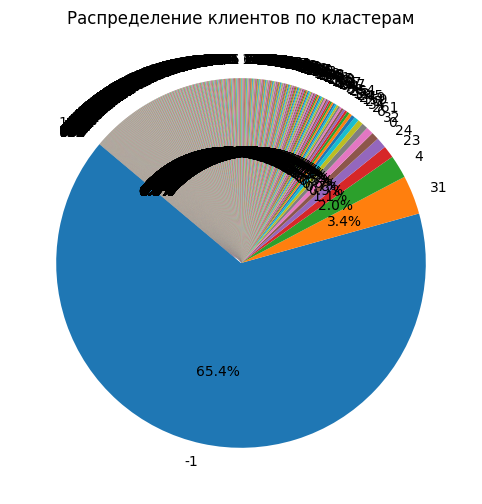

In [19]:
cluster_counts = df_db['Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels = cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение клиентов по кластерам')
plt.show()

### Работа с временным рядом

In [2]:
path='/kaggle/input/labels-my/df_ts_labels_my.csv'
df_labels= pd.read_csv(path, sep=',')

In [3]:
df_labels

,Дата,Количество,Акция
0,2017-01-01,10,1
1,2017-01-02,1205,0
2,2017-01-03,813,0
3,2017-01-04,776,0
4,2017-01-05,897,0
...,...,...,...
359,2018-02-24,3257,1
360,2018-02-25,4105,1
361,2018-02-26,4182,1
362,2018-02-27,3845,1


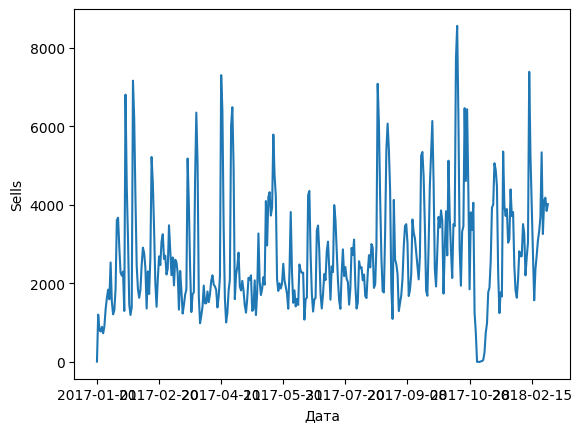

In [4]:
import matplotlib.pyplot as plt
df_labels.plot(x="Дата", y="Количество", legend=None)
plt.ylabel("Sells")
plt.show()

Проверка на стационарность

In [7]:
from statsmodels.tsa.stattools import adfuller
df = df_labels.set_index('Дата')
adf_result = adfuller(df['Количество'], autolag='AIC')

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))
# Если статистика ADF меньше критических значений и p-value низкий, гипотеза о наличии единичного корня отвергается (ряд стационарен)

ADF Statistic: -4.515425
p-value: 0.000184
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [10]:
from statsmodels.tsa.stattools import kpss
df = df_labels.set_index('Дата')
kpss_test = kpss(df['Количество'], regression='c')

print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('Critical Values:')
for key, value in kpss_test[3].items():
    print('\t%s: %.3f' % (key, value))

# Если статистика KPSS превышает критические значения и p-value низкий, нулевая гипотеза о стационарности отвергается (ряд может быть нестационарен)

KPSS Statistic: 0.644018
p-value: 0.018635
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


дифференцирование ряда для проверка на стационарность

In [11]:
df_diff = df.diff().dropna()

adf_test_diff = adfuller(df_diff['Количество'], autolag='AIC')
print('Дики-Фуллер после дифференцирования:')
print('ADF Statistic: %f' % adf_test_diff[0])
print('p-value: %f' % adf_test_diff[1])
print('Critical Values:')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

Дики-Фуллер после дифференцирования:
ADF Statistic: -8.411592
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [12]:
kpss_test_diff = kpss(df_diff['Количество'], regression='c')
print('\nKPSS после дифференцирования:')
print('KPSS Statistic: %f' % kpss_test_diff[0])
print('p-value: %f' % kpss_test_diff[1])
print('Critical Values:')
for key, value in kpss_test_diff[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS после дифференцирования:
KPSS Statistic: 0.097758
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/tmp/ipykernel_34/3783234436.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_diff = kpss(df_diff['Количество'], regression='c')


### SARIMA- данные о количестве продаж без учёта акций

In [3]:
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

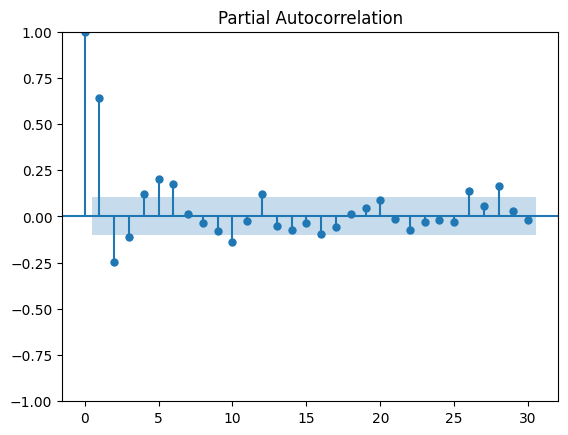

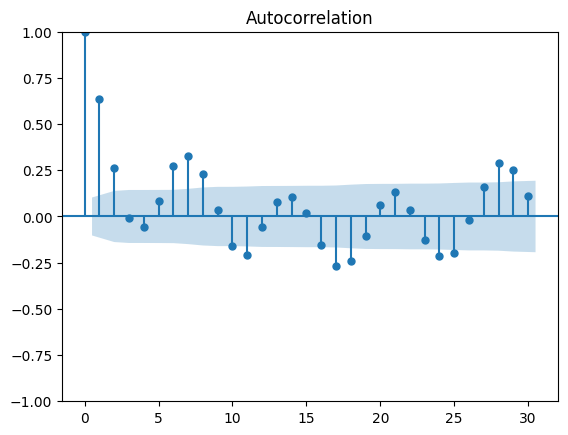

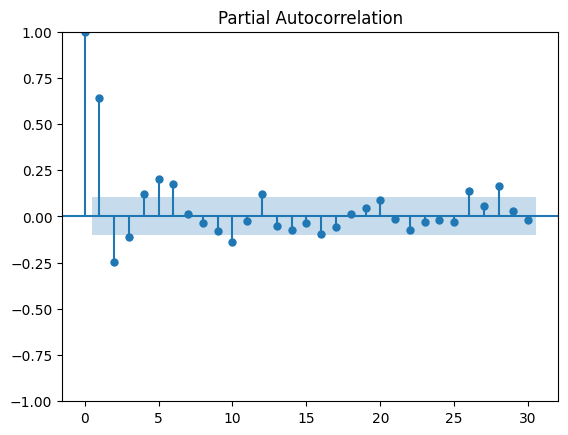

In [4]:
y = df_labels[['Количество']].to_numpy()

plot_acf(y, lags=30)
plot_pacf(y, method="ols",lags=30)

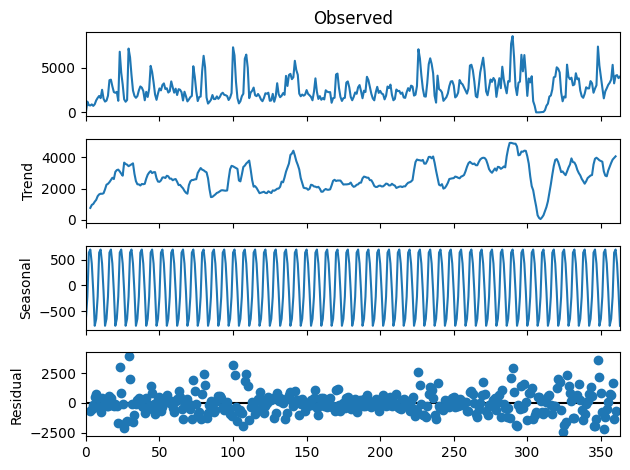

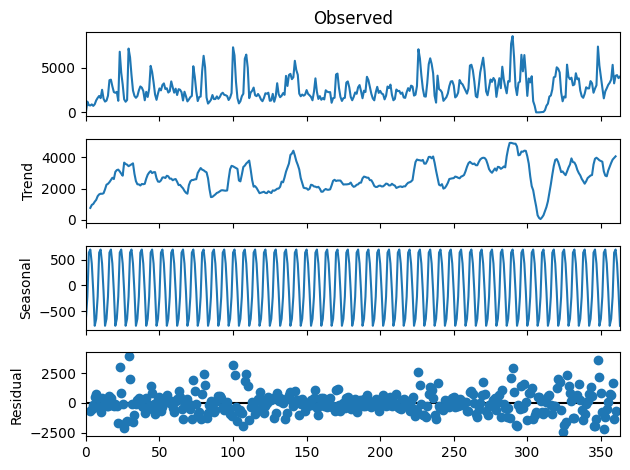

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(y, period = 7, model="additive")
decompose_data.plot()

In [8]:
import statsmodels.api as sm
resDiff = sm.tsa.arma_order_select_ic(y, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: Use

ARMA(p,q) = (3, 2) is the best.


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
Y = df_labels[['Количество']]
Y = Y[:-90]
X = df_labels.iloc [:, 2]
X = X[:-90]

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

In [9]:
def rmsle_m(actual, pred):
    actual_log = np.log(np.array(actual) + 1)
    pred_log = np.log(np.array(pred) + 1)
    return np.sqrt(np.mean(np.square(actual_log - pred_log)))

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

- order=(p, d, q)
- seasonal_order=(P, D, Q, s):
P – сезонный порядок авторегрессии.
D – степень сезонного дифференцирования.
Q – сезонный порядок скользящего среднего.
s – длина сезонного цикла.

In [10]:
y3 = y.copy()
y3 = y3[:-91]
model2 = SARIMAX(y3, order=(3, 1, 2),seasonal_order=(1, 1, 1, 30))
model_fit = model2.fit(disp=False)
yhat1 = model_fit.predict(start=273, end = 363)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
y4 = np.append(y3, yhat1)

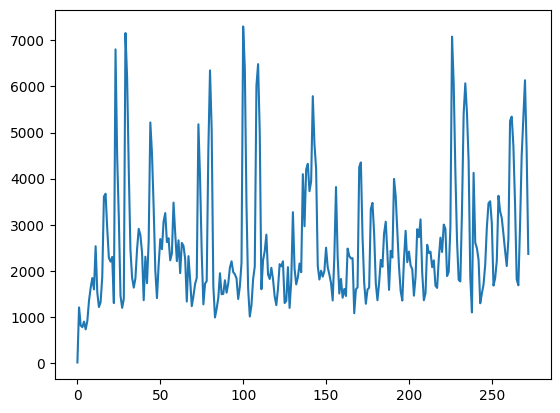

In [12]:
plt.plot(y3)

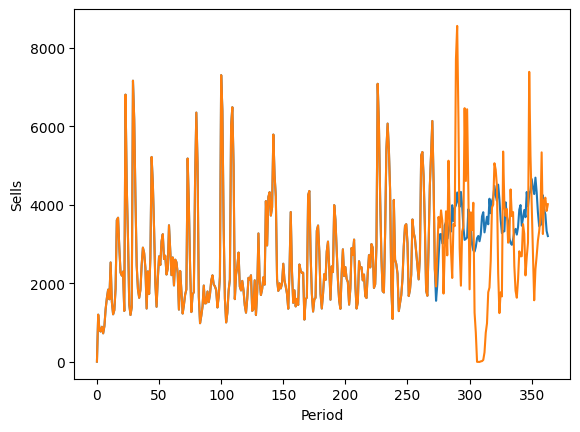

In [13]:
plt.ylabel("Sells")
plt.xlabel("Period")

plt.plot(y4)
plt.plot(y)

In [14]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_log_error as rmsle

In [15]:
mape(y[-90:],y4[-90:])

43.09091171961529

In [25]:
rmsle_m(y[-90:],y4[-90:])

1.6336151349538552

### SARIMAX на данных о количестве продаж с учётом акций

In [18]:
exog = df_labels.iloc [:, 2].to_numpy()
exog = exog[:-90]
exog1 = exog[-90:]

In [19]:
y1 = y.copy()
y1 = y1[:-90]
model = SARIMAX(y1, order=(3, 1, 2),seasonal_order=(2, 1, 1, 120), exog = exog)
model_fit = model.fit(disp=False)
yhat = model_fit.predict(start=273, end = 363, exog = exog1)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
y2 = np.append(y1, yhat)

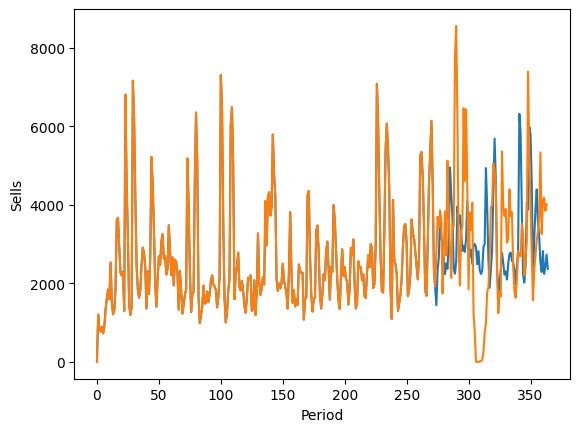

In [21]:
plt.ylabel("Sells")
plt.xlabel("Period")
#plt.plot(y1)
plt.plot(y2)
plt.plot(y)

In [22]:
mape(y[-90:],y2[-90:])

34.172931793213245

In [24]:
rmsle_m(y[-90:],y2[-90:])

1.5977615302019048

### Prophet на данных о количестве продаж без учёта акций

In [10]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 36.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 4.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293378 sha256=266730137f2484bf2b0eac99c7c9d453811b094afe325266edff56617b5605b0
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


In [11]:
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '${:,.2f}'.format

In [12]:
df_labels['Дата'] = pd.to_datetime(df_labels['Дата'])

In [13]:
df = df_labels[['Дата', 'Количество']]

In [14]:
df.columns = ['ds', 'y']

In [15]:
df.head(-5)

,ds,y
0,2017-01-01,10
1,2017-01-02,1205
2,2017-01-03,813
3,2017-01-04,776
4,2017-01-05,897
...,...,...
354,2018-02-19,2705
355,2018-02-20,3092
356,2018-02-21,3325
357,2018-02-22,3684


In [8]:
#df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      364 non-null    datetime64[ns]
 1   y       364 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [16]:
x = df["ds"]
y = df["y"]
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y))

fig.update_layout(
    title_text="Time series plot of sells",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

In [17]:
train_df = df[:-90] 

In [114]:
m = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.09) 
m.add_seasonality(name='monthly', period=30.5, fourier_order=7)  
m.add_seasonality(name='quarterly', period=91.25, fourier_order=6) 
m.add_seasonality(name='days', period=12, fourier_order=3)

m.fit(train_df)

23:18:18 - cmdstanpy - INFO - Chain [1] start processing
23:18:18 - cmdstanpy - INFO - Chain [1] done processing


In [115]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

In [116]:
plot_plotly(m, forecast)

In [117]:
plot_components_plotly(m, forecast)

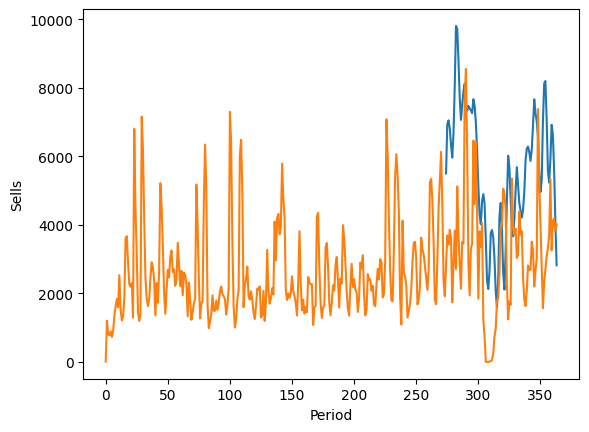

In [118]:
plt.ylabel("Sells")
plt.xlabel("Period")
y1 = df['y']
y2 = forecast['yhat_upper'][-90:]
plt.plot(y2)
plt.plot(y)

In [119]:
mape(y[-90:],y2[-90:])

36.11736587083994

In [121]:
rmsle_m(y[-90:],y2[-90:])

1.679217906938097

# Prophet на данныз о количестве продаж с учётом акций

In [190]:
dfr = df_labels[['Дата', 'Количество']]

In [191]:
r = df.iloc [:, 2]
r=r[:-90] 

In [192]:
r2 = df.iloc [:, 2][-90:]

In [193]:
reg = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.09)

reg.add_seasonality(name='monthly', period=30.5, fourier_order=7)
reg.add_seasonality(name='quarterly', period=91.25, fourier_order=6)
reg.add_seasonality(name='days', period=12, fourier_order=3)

In [194]:
reg.add_regressor('r')

In [195]:
dfr.columns = ['ds', 'y']
train_df = dfr[:-90] 

In [196]:
train_df['r']=r

In [197]:
reg.fit(train_df)

00:54:45 - cmdstanpy - INFO - Chain [1] start processing
00:54:45 - cmdstanpy - INFO - Chain [1] done processing


In [198]:
future = reg.make_future_dataframe(periods=90)
future['r']=df.iloc [:, 2]
forecast = reg.predict(future)

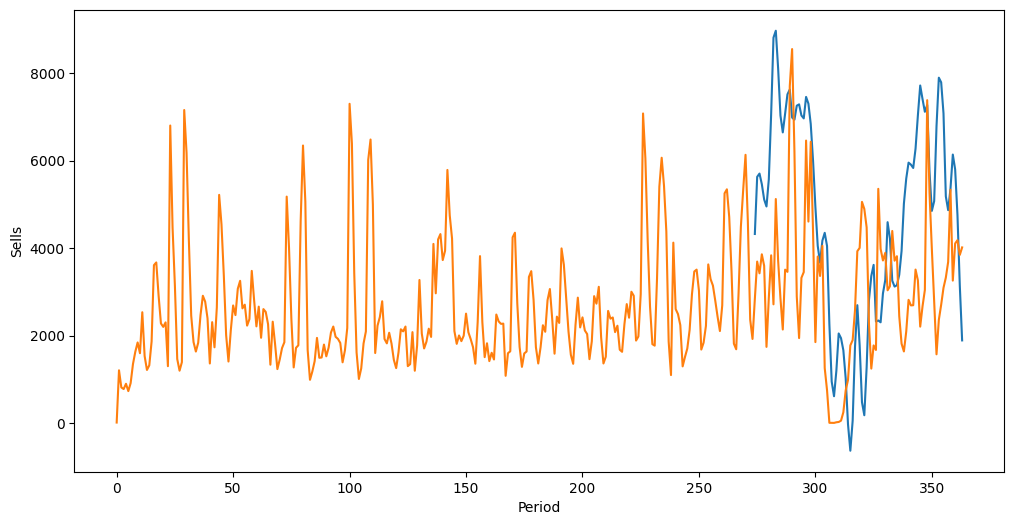

In [201]:
plt.figure(figsize=(12, 6))
plt.ylabel("Sells")
plt.xlabel("Period")
y1 = dfr['y']
y2 = forecast['yhat'][-90:]
plt.plot(y2)
plt.plot(y)

In [202]:
mape(y1[-90:], y2)

16.25160222851661

In [206]:
mask = (y1[-90:] >= 0) & (y2 >= 0)
y1_filtered = y1[-90:][mask]
y2_filtered = y2[mask]

In [209]:
rmsle_m(y1_filtered, y2_filtered)

1.577473975962514

### Vanilla LSTM на данных о количествах продаж

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = df_labels['Количество'].values.reshape(-1, 1)

# Нормализуем данные
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

train_size = len(data_scaled) - 90
test_size = 90
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]
# Преобразование данных в матрицу X и вектор y
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
test_index = range(len(train), len(data_scaled))

Epoch 1/100
272/272 - 2s - 6ms/step - loss: 0.0259
Epoch 2/100
272/272 - 1s - 2ms/step - loss: 0.0165
Epoch 3/100
272/272 - 1s - 2ms/step - loss: 0.0159
Epoch 4/100
272/272 - 1s - 2ms/step - loss: 0.0158
Epoch 5/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 6/100
272/272 - 1s - 2ms/step - loss: 0.0158
Epoch 7/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 8/100
272/272 - 1s - 2ms/step - loss: 0.0157
Epoch 9/100
272/272 - 1s - 2ms/step - loss: 0.0155
Epoch 10/100
272/272 - 1s - 2ms/step - loss: 0.0157
Epoch 11/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 12/100
272/272 - 1s - 2ms/step - loss: 0.0157
Epoch 13/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 14/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 15/100
272/272 - 1s - 2ms/step - loss: 0.0155
Epoch 16/100
272/272 - 1s - 2ms/step - loss: 0.0155
Epoch 17/100
272/272 - 1s - 2ms/step - loss: 0.0156
Epoch 18/100
272/272 - 1s - 2ms/step - loss: 0.0155
Epoch 19/100
272/272 - 1s - 2ms/step - loss: 0.0156
Epoch 20/100
272/272 

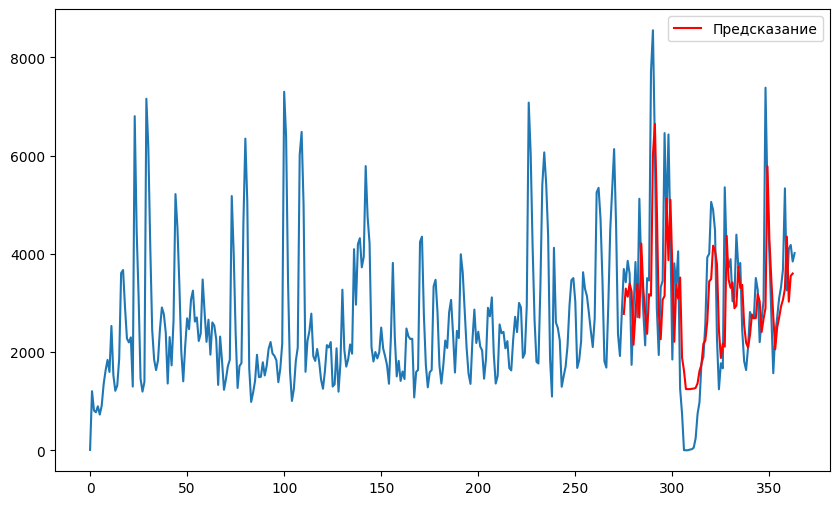

In [125]:
test_start_index = len(train) + look_back

plt.figure(figsize=(10, 6))
plt.plot(data)
plt.plot(range(test_start_index, test_start_index + len(test_predict)), test_predict, label='Предсказание', color='red')
plt.show()

In [141]:
rmsle_m(y_true, test_predict)

1.35369780750414

In [139]:
mape(y_true, test_predict)

18.452594540605677

### Vanilla LSTM на данных о количестве продаж с учётом акций

In [143]:
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

data_quantity = df_labels['Количество'].values.reshape(-1, 1)
data_action = df_labels['Акция'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_quantity_scaled = scaler.fit_transform(data_quantity)

data_combined = np.hstack((data_quantity_scaled, data_action))
train_size = len(data_combined) - 90
test_size = 90
train, test = data_combined[0:train_size, :], data_combined[train_size:len(data_combined), :]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :2] 
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 2))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 2))

model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 2))) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Epoch 1/100
272/272 - 2s - 6ms/step - loss: 0.0308
Epoch 2/100
272/272 - 1s - 2ms/step - loss: 0.0173
Epoch 3/100
272/272 - 1s - 2ms/step - loss: 0.0163
Epoch 4/100
272/272 - 1s - 2ms/step - loss: 0.0157
Epoch 5/100
272/272 - 1s - 2ms/step - loss: 0.0156
Epoch 6/100
272/272 - 1s - 2ms/step - loss: 0.0160
Epoch 7/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 8/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 9/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 10/100
272/272 - 1s - 2ms/step - loss: 0.0152
Epoch 11/100
272/272 - 1s - 5ms/step - loss: 0.0155
Epoch 12/100
272/272 - 1s - 3ms/step - loss: 0.0155
Epoch 13/100
272/272 - 1s - 4ms/step - loss: 0.0153
Epoch 14/100
272/272 - 1s - 2ms/step - loss: 0.0155
Epoch 15/100
272/272 - 1s - 2ms/step - loss: 0.0153
Epoch 16/100
272/272 - 1s - 2ms/step - loss: 0.0156
Epoch 17/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 18/100
272/272 - 1s - 2ms/step - loss: 0.0155
Epoch 19/100
272/272 - 1s - 2ms/step - loss: 0.0154
Epoch 20/100
272/272 

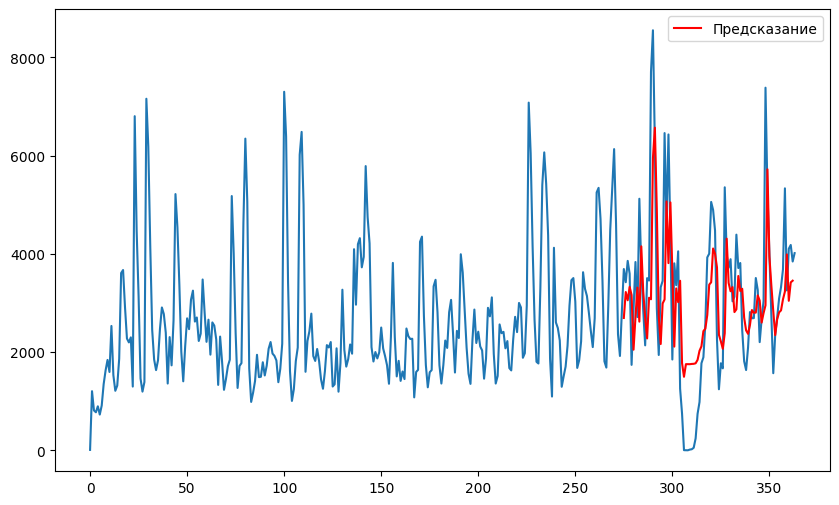

In [144]:
test_start_index = len(train) + look_back

plt.figure(figsize=(10, 6))
plt.plot(data)
plt.plot(range(test_start_index, test_start_index + len(test_predict)), test_predict, label='Предсказание', color='red')
plt.legend()
plt.show()

In [148]:
y_test_reshaped = y_test.reshape(-1, 1)

In [151]:
mape(y_test_reshaped, test_predict)

23.66736169556135

In [152]:
rmsle_m(y_test_reshaped, test_predict)

1.4245591895020078

### Stacked LSTM

In [172]:
data = df_labels['Количество'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

train_size = len(data_scaled) - 90
test_size = 90
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_stacked = Sequential()
model_stacked.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], look_back)))
model_stacked.add(Dropout(0.2))
model_stacked.add(LSTM(50, activation='relu', return_sequences=True))
model_stacked.add(Dropout(0.2))
model_stacked.add(LSTM(50, activation='relu'))
model_stacked.add(Dense(1))

model_stacked.compile(optimizer='adam', loss='mean_squared_error')

print(X_train.shape)
print(y_train.shape)

model_stacked.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

train_predict = model_stacked.predict(X_train)
test_predict = model_stacked.predict(X_test)


(272, 1, 1)
(272,)
Epoch 1/100
272/272 - 7s - 25ms/step - loss: 0.0358
Epoch 2/100
272/272 - 0s - 2ms/step - loss: 0.0210
Epoch 3/100
272/272 - 0s - 2ms/step - loss: 0.0186
Epoch 4/100
272/272 - 0s - 2ms/step - loss: 0.0174
Epoch 5/100
272/272 - 0s - 2ms/step - loss: 0.0160
Epoch 6/100
272/272 - 0s - 2ms/step - loss: 0.0154
Epoch 7/100
272/272 - 0s - 2ms/step - loss: 0.0164
Epoch 8/100
272/272 - 0s - 2ms/step - loss: 0.0171
Epoch 9/100
272/272 - 0s - 2ms/step - loss: 0.0167
Epoch 10/100
272/272 - 0s - 2ms/step - loss: 0.0165
Epoch 11/100
272/272 - 0s - 2ms/step - loss: 0.0162
Epoch 12/100
272/272 - 0s - 2ms/step - loss: 0.0164
Epoch 13/100
272/272 - 0s - 2ms/step - loss: 0.0161
Epoch 14/100
272/272 - 0s - 2ms/step - loss: 0.0165
Epoch 15/100
272/272 - 0s - 2ms/step - loss: 0.0165
Epoch 16/100
272/272 - 0s - 2ms/step - loss: 0.0177
Epoch 17/100
272/272 - 0s - 2ms/step - loss: 0.0169
Epoch 18/100
272/272 - 0s - 2ms/step - loss: 0.0167
Epoch 19/100
272/272 - 0s - 2ms/step - loss: 0.0168
E

In [174]:
real_data_plot = scaler.inverse_transform(data_scaled)

test_predict_rescaled = scaler.inverse_transform(test_predict)

test_predictions_plot = np.empty_like(data_scaled)
test_predictions_plot[:, :] = np.nan
test_predictions_plot[len(train) + look_back:len(data_scaled) - 1, :] = test_predict_rescaled


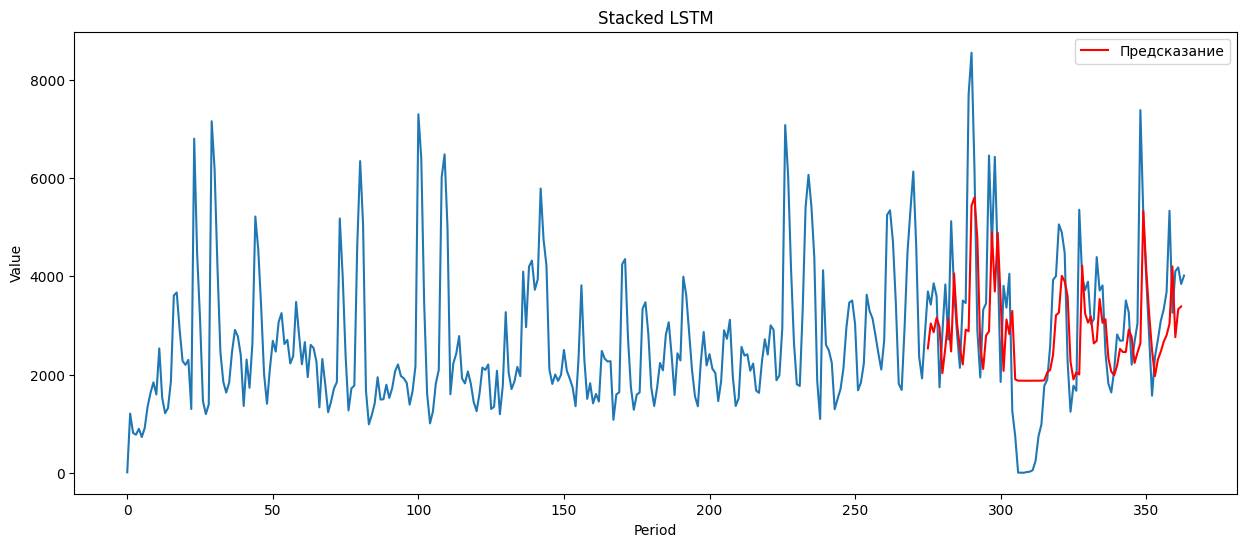

In [175]:
plt.figure(figsize=(15, 6))
plt.plot(real_data_plot)
plt.plot(test_predictions_plot, label='Предсказание', color='red') 
plt.title('Stacked LSTM')
plt.xlabel('Period')
plt.ylabel('Value')
plt.legend()
plt.show()


In [176]:
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


In [177]:
mape(y_test_rescaled, test_predict_rescaled)

26.047607845743222

In [179]:
rmsle_m(y_test_rescaled, test_predict_rescaled)

1.453423009813355